In [1]:
import os
import re
import networkx as nx
import matplotlib.pyplot as plt

def analyze_dependencies(folder_path):
    dependency_graph = {}
    matlab_function_pattern = re.compile(r'\b[a-zA-Z]\w*\s*(?=\()')
    
    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.m'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                content = file.read()
            
            # Find all unique function calls
            functions_called = matlab_function_pattern.findall(content)
            base_name = os.path.splitext(filename)[0]
            dependency_graph[base_name] = set(functions_called)
    
    return dependency_graph

def plot_dependency_graph(dependency_graph):
    G = nx.DiGraph()
    
    # Add nodes and edges from the dependency graph
    for caller, callees in dependency_graph.items():
        for callee in callees:
            if callee in dependency_graph:  # Only add edges if callee is a known script
                G.add_edge(caller, callee)
    
    # Draw the graph
    nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2000, font_size=9)
    plt.show()

In [30]:
DATA_DIR = '/storage2/arash/codes/LargeScale-Ephys/PyRatECoG/data/sleep_db'
LABBOX_DIR = '/storage/share/matlab/labbox/'
MYMATLAB_DIR = '/storage2/arash/codes/LargeScale-Ephys/PyRatECoG/scripts/burst/matlab/'
MYBIN = '/storage2/arash/codes/LargeScale-Ephys/PyRatECoG/bin'
TF_DIR = LABBOX_DIR + 'TF'
LABPY_DIR = '/storage2/arash/codes/labpy'

In [5]:
# Example usage
folder_path = TF_DIR
dep_graph = analyze_dependencies(folder_path)

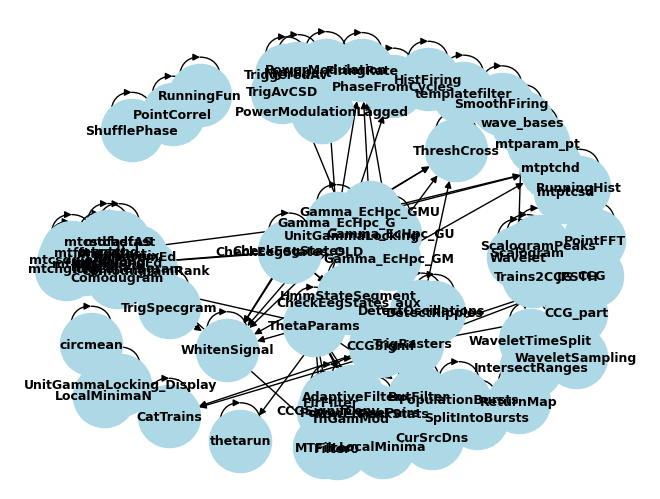

In [6]:
plot_dependency_graph(dep_graph)

In [7]:
import os
import re
import networkx as nx
import matplotlib.pyplot as plt

def analyze_dependencies(folder_path):
    dependency_graph = {}
    matlab_function_pattern = re.compile(r'\b[a-zA-Z]\w*\s*(?=\()')
    
    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.m'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                content = file.read()
            
            # Find all unique function calls
            functions_called = matlab_function_pattern.findall(content)
            base_name = os.path.splitext(filename)[0]
            dependency_graph[base_name] = set(functions_called)
    
    return dependency_graph

def plot_dependency_graph(dependency_graph):
    G = nx.DiGraph()
    
    # Add nodes and edges from the dependency graph
    for caller, callees in dependency_graph.items():
        for callee in callees:
            if callee in dependency_graph:  # Only add edges if callee is a known script
                G.add_edge(caller, callee)
    
    # Layout for a clearer view
    pos = nx.spring_layout(G, scale=2)
    plt.figure(figsize=(12, 12))  # Increase figure size
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2000, font_size=9)
    plt.title('MATLAB Function Dependency Graph')
    plt.savefig('dependency_graph.png')  # Save the figure to a file
    plt.show()

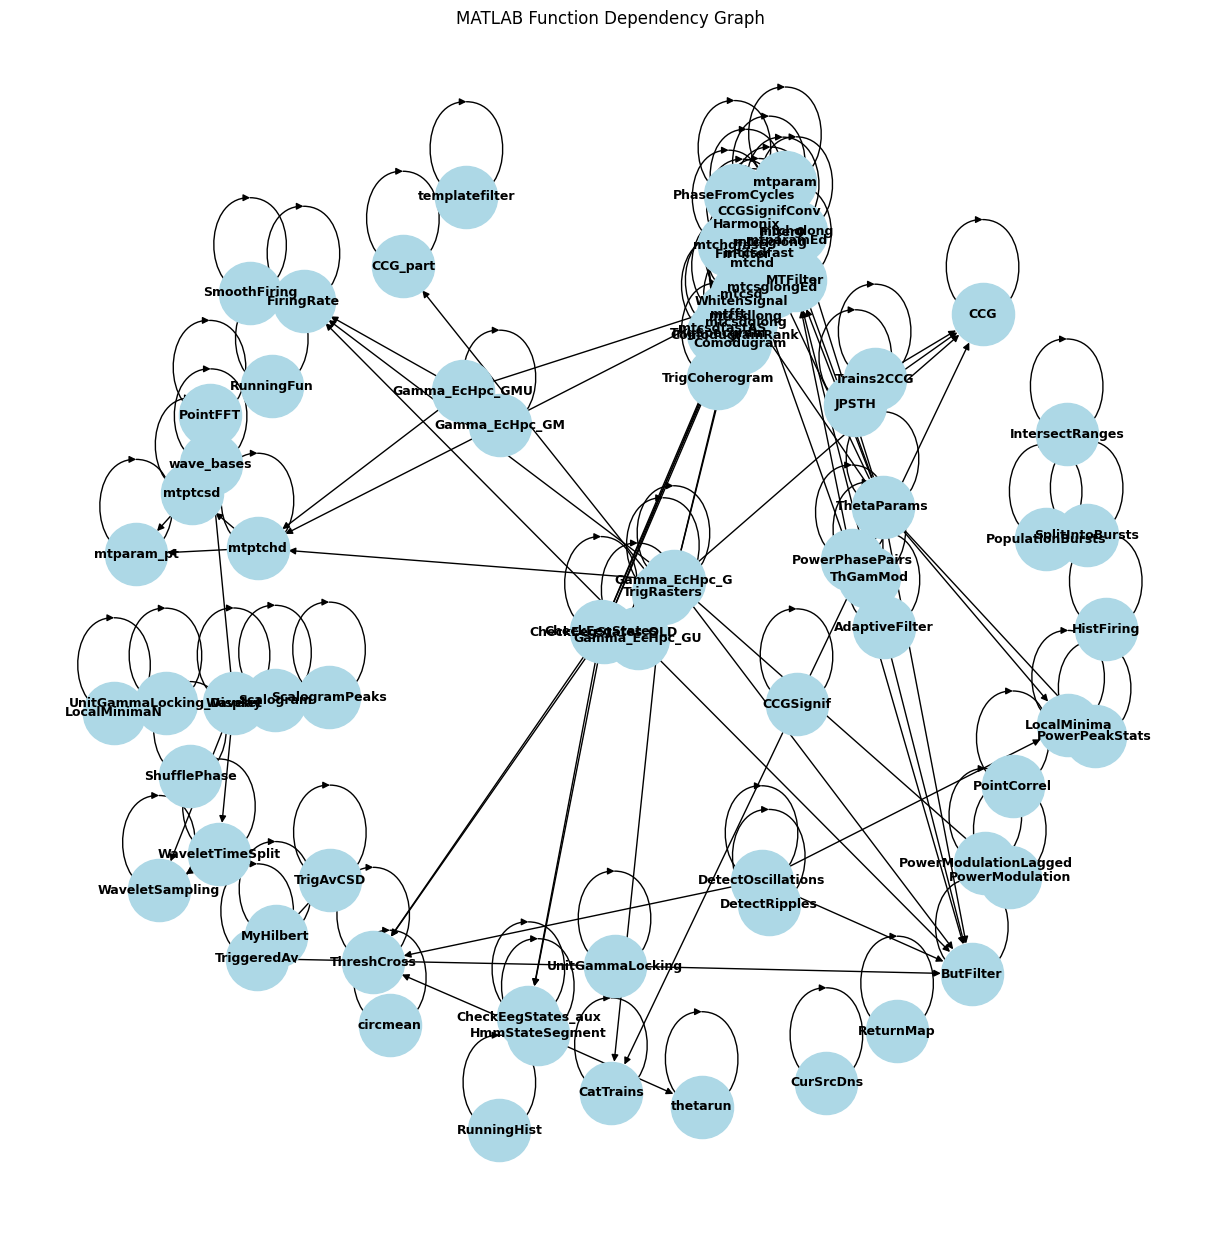

In [8]:
# Example usage
folder_path = TF_DIR
dep_graph = analyze_dependencies(folder_path)
plot_dependency_graph(dep_graph)

In [18]:
labpy_DIR_mk = '/storage2/arash/codes/labpy/labbox_markdown'

In [31]:
import os
import re

def generate_markdown_files(folder_path, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Regex to find MATLAB function calls
    matlab_function_pattern = re.compile(r'\b[a-zA-Z]\w*\s*(?=\()')

    # Recursively traverse the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.m'):
                file_path = os.path.join(root, file)
                base_name = os.path.splitext(file)[0]
                try:
                    with open(file_path, 'r') as file_content:
                        content = file_content.read()
                except:
                    print(f"Error reading file: {file_path}")
                # Find all unique function calls
                calls = set(matlab_function_pattern.findall(content))

                # Determine relative output path
                relative_path = os.path.relpath(root, folder_path)
                output_path = os.path.join(output_folder, relative_path)
                os.makedirs(output_path, exist_ok=True)

                # Write Markdown file
                md_content = f"# {base_name}\n\n## Function Calls\n"
                for call in calls:
                    md_link = os.path.join(relative_path, f"{call}.md").replace('\\', '/')
                    md_content += f"- [{call}]({md_link})\n"

                # Save the markdown file
                with open(os.path.join(output_path, f"{base_name}.md"), 'w') as md_file:
                    md_file.write(md_content)

In [32]:
from pathlib import Path
list(Path(labpy_DIR_mk).glob('*'))

[PosixPath('/storage2/arash/codes/labpy/labbox_markdown/Behavior'),
 PosixPath('/storage2/arash/codes/labpy/labbox_markdown/Graphics')]

In [33]:
# %%debug

source_folder = LABBOX_DIR
output_md_folder = labpy_DIR_mk
generate_markdown_files(source_folder, output_md_folder)

Error reading file: /storage/share/matlab/labbox/Graphics/bplot.m
Error reading file: /storage/share/matlab/labbox/Graphics/cprintf.m
Error reading file: /storage/share/matlab/labbox/Graphics/draw_ellipse.m
Error reading file: /storage/share/matlab/labbox/Graphics/xticklabel_rotate.m
Error reading file: /storage/share/matlab/labbox/Graphics/freezeColors/cbfreeze.m
Error reading file: /storage/share/matlab/labbox/Graphics/export_fig/print2eps.m
Error reading file: /storage/share/matlab/labbox/Graphics/cm_and_cb_utilities/cblabel.m
Error reading file: /storage/share/matlab/labbox/Graphics/cm_and_cb_utilities/cbunits.m
Error reading file: /storage/share/matlab/labbox/Helper/groundTruthLFP.m
Error reading file: /storage/share/matlab/labbox/Stats/CircStat2012a/circ_plot.m
Error reading file: /storage/share/matlab/labbox/EMG_removing/util/FastICA_25/fastica.m
Error reading file: /storage/share/matlab/labbox/EMG_removing/util/FastICA_25/fasticag.m
Error reading file: /storage/share/matlab/lab

# Adaptive Filter

In [ ]:
%function y = AdaptiveFilter([Eeg, Freq], fMode, Window, Overlap, FrWidth)
function y = AdaptiveFilter(x, varargin)
[fMode, Window, Overlap,FrWidth,Fs] = DefaultArgs(varargin,{'filter',1250*2,625,2,1250});
dbs = dbstack;
ChunkIt = 1;
%if length(dbs)==1 ChunkIt=1; end
%if length(dbs)>1 & ~strcmp(dbs(end-2).name,mfilename) ChunkIt=1; end
if length(dbs)>2 && strcmp(dbs(3).name, mfilename) ChunkIt=0;end 

if ChunkIt
    %y = ProcessInChunks(x,'AdaptiveFilter', Window,Overlap, 'filter');   
    y = ProcessInChunks(x,'AdaptiveFilter', Window,Overlap, 'filter',Window, Overlap,FrWidth,Fs);   
    return;
end


switch fMode        
    case 'filter'
        if size(x,1)==Window
            myRange = [Overlap size(x,1)-Overlap];
        else
            myRange = [1 size(x,1)];
        end
        myFreqCent = median(x(myRange(1):myRange(2),2));
        myFreqRange = myFreqCent +[-FrWidth/2 FrWidth/2]; 
       
        
        
        y(:,1) = ButFilter(x(:,1),2,myFreqRange/Fs*2,'bandpass');
        rt = RayleighTest(angle(hilbert(y(:,1))));
       % if rt.r>0.5 keyboard; end
    %     y(:,1) = MTFilter(x(:,1), myFreqRange, Fs, 2^nextpow2(0.5*Fs));
        y(:,2) = repmat(myFreqCent,size(x,1),1);
end
return

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert
from numpy import angle, median

def adaptive_filter(x, f_mode='filter', window=2500, overlap=625, fr_width=2, fs=1250):
    def but_filter(data, order, freq_range, btype):
        b, a = butter(order, freq_range, btype=btype)
        return filtfilt(b, a, data)
    
    def rayleigh_test(phase_data):
        # Placeholder for actual Rayleigh test implementation
        pass

    def process_in_chunks(data, func, window, overlap, *args, **kwargs):
        # This function should handle chunk processing, but here is a placeholder
        return func(data, *args, **kwargs)

    # Check if function is called recursively, decide whether to chunk
    chunk_it = True  # Placeholder condition; adapt based on actual call stack or requirements

    if chunk_it:
        return process_in_chunks(x, adaptive_filter, window, overlap, f_mode, window, overlap, fr_width, fs)

    if f_mode == 'filter':
        if x.shape[0] == window:
            my_range = [overlap, x.shape[0] - overlap]
        else:
            my_range = [1, x.shape[0]]

        my_freq_cent = median(x[my_range[0]:my_range[1], 1])
        my_freq_range = [my_freq_cent - fr_width / 2, my_freq_cent + fr_width / 2]
        
        filtered_signal = but_filter(x[:, 0], 2, np.array(my_freq_range) / fs * 2, 'bandpass')
        phase_data = angle(hilbert(filtered_signal))
        rayleigh_test(phase_data)
        
        freq_column = np.full(x.shape[0], my_freq_cent)
        y = np.column_stack((filtered_signal, freq_column))

        return y

# Example use
x = np.random.randn(2500, 2)  # Example input
fs = 1250
result = adaptive_filter(x, fs=fs)


# RayleighTest

In [3]:
import numpy as np

def rayleigh_test(th):
    if len(th) == 0:
        return np.nan, np.nan, np.nan

    # Convert angles to complex numbers
    x = np.exp(1j * th)
    m = np.mean(x)

    # Calculate the mean angle and radial distance
    th0 = np.angle(m)
    r = np.abs(m)
    n = len(th)

    # Calculate the Rayleigh's R statistic
    z = n * r * r

    # Calculate the p-value using the series expansion approximation
    p = np.exp(-z) * (
        1 + (2*z - z*z) / (4*n) - (24*z - 132*z*z + 76*z**3 - 9*z**4) / (288*n**2)
    )

    return p, th0, r

# Example usage
th = np.random.uniform(0, 2*np.pi, 100)  # 100 random angles
p, th0, r = rayleigh_test(th)
print("p-value:", p)
print("Mean angle:", th0)
print("Radial distance:", r)

p-value: 0.057511626744007574
Mean angle: 1.0594970335557254
Radial distance: 0.1688087778183986


In [4]:
# Example angles in radians
angles = np.array([0.1, 0.2, 0.15, 0.2, 0.25, 0.2])
# Call Rayleigh Test
p, th0, r = rayleigh_test(angles)
print("p-value:", p, "Mean angle (th0):", th0, "Radial distance (r):", r)

p-value: -2.4575604162342883e-05 Mean angle (th0): 0.18334182661683043 Radial distance (r): 0.9988893710798372


In [31]:
import matlab.engine


eng = matlab.engine.start_matlab()
eng.addpath(eng.genpath(LABBOX_DIR, nargout=1), nargout=0)
eng.addpath(eng.genpath(LABPY_DIR, nargout=1), nargout=0)

In [19]:
matlab.double(angles.tolist())

matlab.double([[0.1,0.2,0.15,0.2,0.25,0.2]])

In [32]:
res1, res2, res3 = eng.RayleighTest(matlab.double(angles.tolist()), nargout=3)
print("p-value:", res1)
print("Mean angle:", res2)
print("Radial distance:", res3)

p-value: 0.5132222956691395
Mean angle: 0.18334182661683043
Radial distance: 0.9988893710798371


In [33]:
res1, res2, res3 = eng.RayleighTest2(matlab.double(angles.tolist()), nargout=3)
print("p-value:", res1)
print("Mean angle:", res2)
print("Radial distance:", res3)

p-value: -2.4575604162342135e-05
Mean angle: 0.18334182661683043
Radial distance: 0.9988893710798371


# Whiten Signal

# mtchd